In [41]:
# repeat copy 
import os
import shutil
directory = '/ubc/cs/research/kmyi/svsamban/research/kaolin-wisp/data/heart2/val'
src = '/ubc/cs/research/kmyi/svsamban/research/kaolin-wisp/data/heart2/train/r_0.png'
for filename in sorted(os.listdir(directory)):
    f = os.path.join(directory, filename)
    if src != f:
        shutil.copy(src, f)

In [18]:
frame = {
            "file_path": "./train/",
            "warp_id": -1,
            "rotation": 0.012566370614359171,
            "transform_matrix": [
                [
                    -0.9999021887779236,
                    0.004192245192825794,
                    -0.013345719315111637,
                    -0.05379832163453102
                ],
                [
                    -0.013988681137561798,
                    -0.2996590733528137,
                    0.95394366979599,
                    3.845470428466797
                ],
                [
                    -4.656612873077393e-10,
                    0.9540371894836426,
                    0.29968830943107605,
                    1.2080823183059692
                ],
                [
                    0.0,
                    0.0,
                    0.0,
                    1.0
                ]
            ]
        }

In [51]:
import json 
import os


dataset = 'kacper'
ver = 'train'
# filename  = '/ubc/cs/research/kmyi/svsamban/research/kaolin-wisp/data/'+dataset+'/transforms_'+ver+'.json'
# filename2 = '/ubc/cs/research/kmyi/svsamban/research/kaolin-wisp/data/'+dataset+'/transforms_'+ver+'2.json'
filename  = '/ubc/cs/research/kmyi/svsamban/research/kaolin-wisp/data/heartsr/transforms_train.json'
filename2 = '/ubc/cs/research/kmyi/svsamban/research/kaolin-wisp/data/heartsr/transforms_val2.json'
with open(filename, 'r') as f:
    data = json.load(f)
    frames = []
    frame = data['frames'][0]

    for i in range(len(data['frames'])):
        # x = frame.copy()
        # x['file_path'] = data['frames'][i]['file_path'] #to keep og file path name
        if i<len(data['frames']):
            x = data['frames'][i].copy()
            x['warp_id'] = i

            frames.append(x)
    
    data['frames'] = frames


# os.remove(filename)
with open(filename2, 'w') as f:
    json.dump(data, f, indent=4)

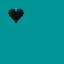

In [39]:
# generate b&w mask
import numpy as np 
from PIL import Image
 
im = Image.open('/ubc/cs/research/kmyi/svsamban/research/kaolin-wisp/data/heart/train/000000.png')
og = im.copy()
# display(og)
im = np.array(im)
im = im/2+150
if len(im.shape) == 2:
    im = np.stack((im,im,im),axis=-1)
im[:,:,0] = np.ones_like(im[:,:,0])
# im[:,:,1] = im[:,:,0]+150/2
# im[:,:,2] = im[:,:,0]/3
# im[:,:,3] = np.ones_like(im[:,:,3])*255
# imnp = im.copy()
im = Image.fromarray(im.astype('uint8'), 'RGB')
display(im)
im.save('/ubc/cs/research/kmyi/svsamban/research/kaolin-wisp/data/heart2/train/r_0.png')


In [7]:
import os
from PIL import Image

img = '/ubc/cs/research/kmyi/svsamban/research/kaolin-wisp/data/lego2/train/r_2.png'
path = '/ubc/cs/research/kmyi/svsamban/research/kaolin-wisp/data/lego2/testfail'

for root, dirs, files in os.walk(path, topdown=False):
    for name in files:
        # print(os.path.join(root, name))

        im = Image.open(img)

        fill_color = (255,255,255)   # your new background color

        im = im.convert("RGBA")   # it had mode P after DL it from OP
        if im.mode in ('RGBA', 'LA'):
            background = Image.new(im.mode[:-1], im.size, fill_color)
            background.paste(im, im.split()[-1]) # omit transparency
            im = background
        # result = name.replace(".png", ".jpg")

        im.convert("RGB").save(os.path.join(root, name))

